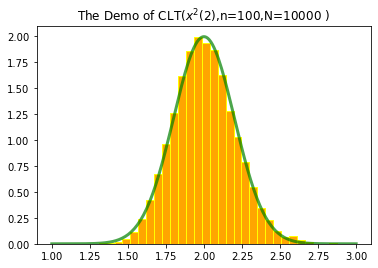

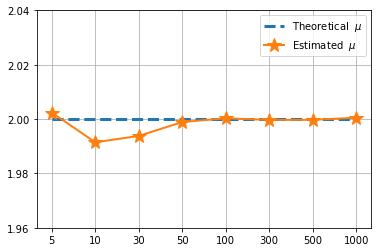

In [196]:
#第四題-中央極限定理_卡方
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import scipy.stats as stats
from scipy.stats import norm, chi2

N = 10000
n = 100
bins = 30
x = chi2.rvs(df=2,size=(N, n))

x_bar = x.mean(axis=1)#axis=1為橫的取平均，=0為值的取平均
plt.title(r"The Demo of CLT($x^2$(2),n=100,N=10000 )")
plt.hist(x_bar,bins=bins,density=True,edgecolor='yellow',color='orange')

mu = 2
sigma =2/np.sqrt(n)
x1 = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 200)
y1 = norm.pdf(x1, loc=mu, scale=sigma)
plt.plot(x1, y1, lw=3, c='g', alpha=0.7)
plt.show()

num=[5,10,30,50,100,300,500,1000]
avg=[]
for i in num:
    x = chi2.rvs(df=2,size=(N, i))
    m=x.sum()/(N*i)
    avg.append(m)
#print(avg)

#平均折線圖
y_major_locator = MultipleLocator(0.02)
ax = plt.gca()
ax.yaxis.set_major_locator(y_major_locator)
plt.ylim(1.96,2.04)
plt.grid()
plt.plot(["5","10","30",'50','100','300',"500",'1000'],[2,2,2,2,2,2,2,2],label= r'Theoretical  $\mu$',linewidth='3',linestyle='--')
plt.plot(["5","10","30",'50','100','300',"500",'1000'],avg,label= r'Estimated  $\mu$',marker="*",linewidth='2',markersize='15')
plt.legend()


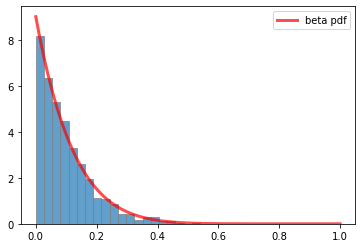

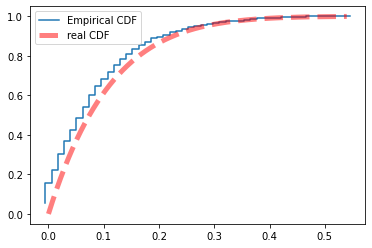

In [7]:
#第四題-均勻相除= beta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import scipy.stats as stats
from scipy.stats import uniform, beta
from numpy import random
from scipy.stats import cumfreq 

r1 = uniform.rvs(0,1,size=(1000,10))
r= r1.min(axis=1)/r1.max(axis=1)
#print(r)
plt.hist(r,bins=20, density=True, alpha=0.7,edgecolor='gray')
x = np.linspace(0,1, 1000)
plt.plot(x, beta.pdf(x,1,9),'r-', lw=3, alpha=0.7)
plt.legend(['beta pdf'],loc='best')
plt.figure()
num_bins = 50
res = cumfreq(r, num_bins)
x = res.lowerlimit + np.linspace(0,res.binsize * res.cumcount.size, res.cumcount.size)
plt.plot(x, res.cumcount/1000, drawstyle = 'steps-pre',label='Empirical CDF')

x_ = np.sort(r) 
beta_= beta.cdf(x_,1, 9)
plt.plot(x_,beta_, color = 'r', linestyle = '--',linewidth = 5, alpha = 0.5, label = 'real CDF')

plt.legend()
plt.show()

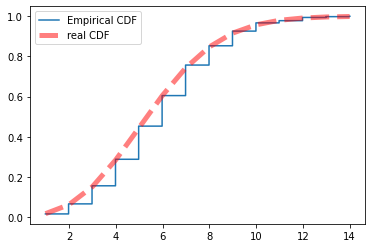

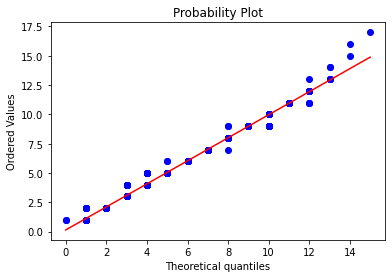

In [8]:
#第四題-poisson相加
from scipy.stats import poisson
from numpy import random
r1 = poisson.rvs(2,size=(1000))
r2= poisson.rvs(4,size=(1000))
r=r1+r2
#print(r)

plt.figure()
num_bins = 1000
res = cumfreq(r, num_bins)
x = res.lowerlimit + np.linspace(0,res.binsize * res.cumcount.size, res.cumcount.size)
plt.plot(x, res.cumcount/1000, drawstyle = 'steps-pre',label='Empirical CDF')

x_ = np.sort(r) 
beta_= poisson.cdf(x_,6)
plt.plot(x_,beta_, color = 'r', linestyle = '--',linewidth = 5, alpha = 0.5, label = 'real CDF')
plt.legend()
plt.show()

p1=random.poisson(lam= 2 , size= 1000 ) 
p2=random.poisson(lam= 4 , size= 1000 ) 
p=p1+p2
plt.figure()
stats.probplot(p, dist='poisson', sparams=(6,), plot=plt)
plt.show()

[1.e-07 1.e-07 1.e-07 ... 1.e-07 1.e-07 1.e-07]


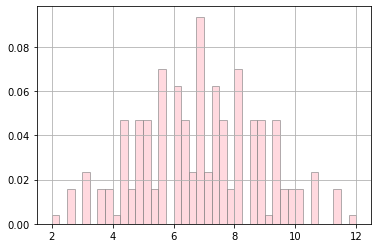

In [381]:
#第五題
import matplotlib.pyplot as plt
a=[2,4,9,12]
n=10000000
sum=np.zeros(shape=n)
x=np.random.choice(a,size=(n,4))
x_bar=x.mean(axis=1)
weights=np.ones_like(x_bar)/len(x_bar)
print(weights)
plt.hist(x_bar,bins=40,weights=weights,alpha=0.6,color='pink',edgecolor='gray',linewidth=1)
plt.grid()